# 6.5 Machine learning clustering

In [1]:
# Importing the libraries that are going to be used and importing the DF
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans
import pylab as pl 

In [2]:
# This option ensures that the graphs you create are displayed within the notebook without the need to "call" them specifically.

%matplotlib inline

In [3]:
#Creating Path
path = r'/Users/gwynreniers/Documents/World Happiness Report'
path

'/Users/gwynreniers/Documents/World Happiness Report'

In [4]:
df = pd.read_csv(os.path.join(path,'world Happiness Report Continents.csv'),
                      index_col = False)

In [5]:
df

,Unnamed: 0.1,Unnamed: 0,Year,Country,Happiness Rank,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Total_views,Continent
0,15,15,2015,Brazil,16,6.983,0.981240,1.232870,0.697020,0.490490,0.175210,0.145740,111,South America
1,22,22,2015,Venezuela,23,6.810,1.044240,1.255960,0.720520,0.429080,0.110690,0.058410,353,South America
2,26,26,2015,Chile,27,6.670,1.107150,1.124470,0.858570,0.441320,0.128690,0.333630,121,South America
3,29,29,2015,Argentina,30,6.574,1.053510,1.248230,0.787230,0.449740,0.084840,0.114510,138,South America
4,31,31,2015,Uruguay,32,6.485,1.061660,1.208900,0.811600,0.603620,0.245580,0.232400,151,South America
5,32,32,2015,Colombia,33,6.477,0.918610,1.240180,0.690770,0.534660,0.051200,0.184010,174,South America
6,39,39,2015,Suriname,40,6.269,0.995340,0.972000,0.608200,0.596570,0.136330,0.169910,80,South America
7,47,47,2015,Ecuador,48,5.975,0.864020,0.999030,0.790750,0.485740,0.180900,0.115410,239,South America
8,50,50,2015,Bolivia,51,5.890,0.681330,0.978410,0.539200,0.574140,0.088000,0.205360,292,South America
9,52,52,2015,Paraguay,53,5.878,0.759850,1.304770,0.660980,0.538990,0.082420,0.342400,321,South America


In [28]:
df1 = df.drop(columns =['Year','Unnamed: 0.1','Country','Happiness Rank','Generosity','Total_views','Continent'])


In [29]:
df1

,Unnamed: 0,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption)
0,15,6.983,0.981240,1.232870,0.697020,0.490490,0.175210
1,22,6.810,1.044240,1.255960,0.720520,0.429080,0.110690
2,26,6.670,1.107150,1.124470,0.858570,0.441320,0.128690
3,29,6.574,1.053510,1.248230,0.787230,0.449740,0.084840
4,31,6.485,1.061660,1.208900,0.811600,0.603620,0.245580
5,32,6.477,0.918610,1.240180,0.690770,0.534660,0.051200
6,39,6.269,0.995340,0.972000,0.608200,0.596570,0.136330
7,47,5.975,0.864020,0.999030,0.790750,0.485740,0.180900
8,50,5.890,0.681330,0.978410,0.539200,0.574140,0.088000
9,52,5.878,0.759850,1.304770,0.660980,0.538990,0.082420


### Elbow Technique

In [30]:
# Stating by defining the range of the cluster
num_cl = range(1, 20) 
# Then, defining the k-means cluster in the above range.
kmeans = [KMeans(n_clusters=i) for i in num_cl] 

In [31]:
# Now, create a score for each of the ranges created..
score = [kmeans[i].fit(df1).score(df1) for i in range(len(kmeans))] 

score

[-21228.597390611045,
 -6101.93837850462,
 -2663.2277870864636,
 -1328.8643723984865,
 -897.1215615730748,
 -622.9065307159199,
 -402.0354772676941,
 -313.3804322378731,
 -220.18426787458003,
 -155.82137584525043,
 -107.73218321432148,
 -78.1719176408371,
 -58.23617822025971,
 -44.517380690687546,
 -32.843190192668104,
 -24.74215100988318,
 -20.445991463282,
 -16.428075690791697,
 -13.65214751652503]

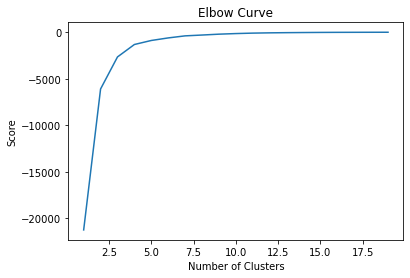

In [32]:
# And finally, create the elbow graph
pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

#### Number of clusters: the curve breaks btween 3 and 5 so I will use 4

### K-means Clustering

In [33]:
# First, create the object based on the n° of clusters
kmeans = KMeans(n_clusters = 4) 

In [34]:
# Then fit the K-mean into the DF
kmeans.fit(df1)

KMeans(n_clusters=4)

### Attach to the dataframe

In [35]:
df1['clusters'] = kmeans.fit_predict(df1)

In [36]:
df1.head()

,Unnamed: 0,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),clusters
0,15,6.983,0.98124,1.23287,0.69702,0.49049,0.17521,1
1,22,6.810,1.04424,1.25596,0.72052,0.42908,0.11069,1
2,26,6.670,1.10715,1.12447,0.85857,0.44132,0.12869,1
3,29,6.574,1.05351,1.24823,0.78723,0.44974,0.08484,1
4,31,6.485,1.06166,1.20890,0.81160,0.60362,0.24558,1


In [37]:
# Verify if the clusters we correctly assigned with a general view
df1['clusters'].value_counts()

1    26
2    13
0    10
3     3
Name: clusters, dtype: int64

### Plotting

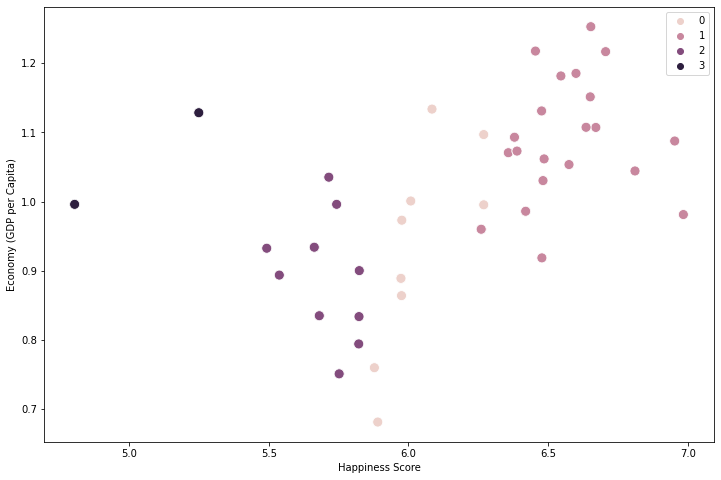

In [38]:
# Happiness Score and Economy (GDP per Capita)

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df1['Happiness Score'], y=df1['Economy (GDP per Capita)'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Happiness Score') # Label x-axis.
plt.ylabel('Economy (GDP per Capita)') # Label y-axis.
plt.show()

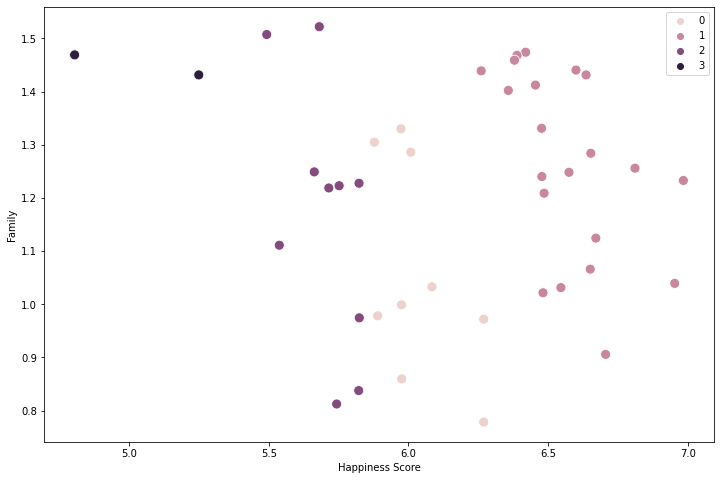

In [39]:
# Happiness Score and Family.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df1['Happiness Score'], y=df1['Family'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Happiness Score') # Label x-axis.
plt.ylabel('Family') # Label y-axis.
plt.show()

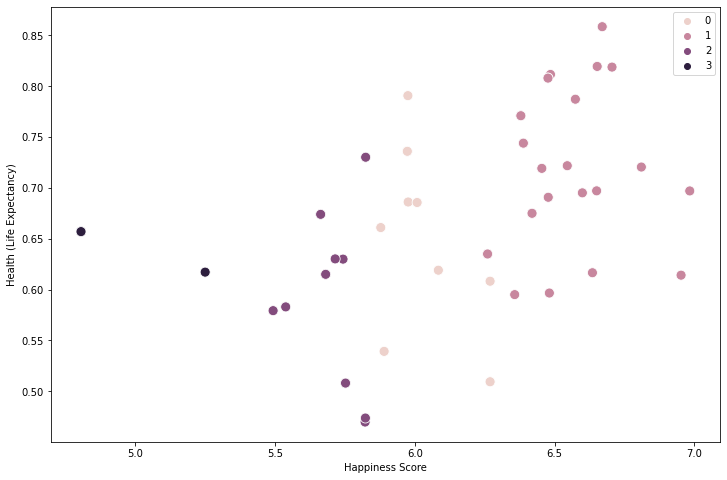

In [40]:
# Happiness Score and Health (Life Expectancy) 

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df1['Happiness Score'], y=df1['Health (Life Expectancy)'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Happiness Score') # Label x-axis.
plt.ylabel('Health (Life Expectancy)') # Label y-axis.
plt.show()

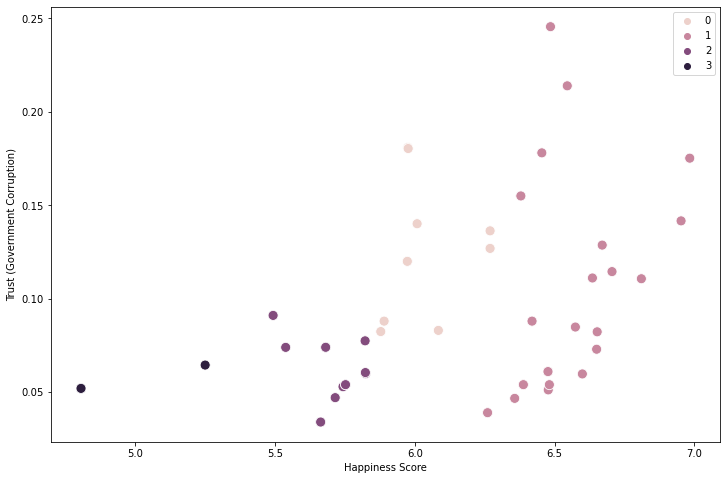

In [41]:
#Happiness Score and Trust (Government Corruption)

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df1['Happiness Score'], y=df1['Trust (Government Corruption)'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Happiness Score') # Label x-axis.
plt.ylabel('Trust (Government Corruption)') # Label y-axis.
plt.show()

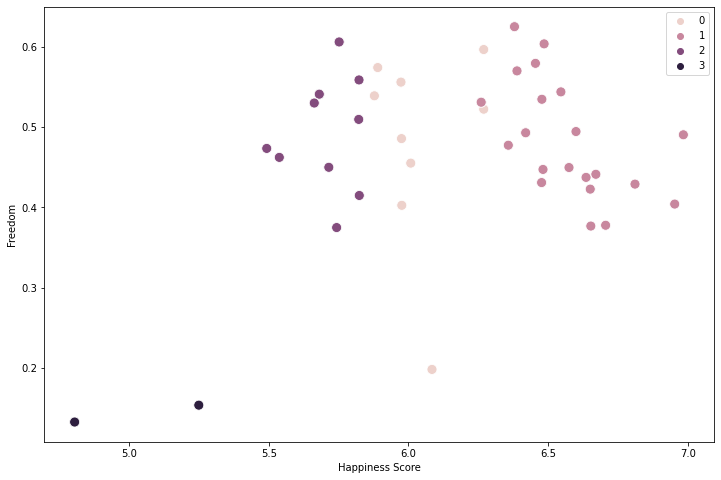

In [43]:
#Happiness Score and Freedom

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df1['Happiness Score'], y=df1['Freedom'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Happiness Score') # Label x-axis.
plt.ylabel('Freedom') # Label y-axis.
plt.show()

## Plot Analysis

### Happiness Score and Economy (GDP per Capita): This shows that the lower the GDP of the country the lower the happiness score, it does show that the happiest countries are in the middle of the GDP scale however.

### Happiness Score and Family: the first cluster shows that the highest family ranking have the least happiness, and those who rank in the middle with family are the happiest.

### Happiness Score and Health (Life Expectancy): this plot shows that those with a higher life expectancy are happier, although there is a cluster that while they have a medium range of life expectancy fall into the low end of the happiness scale.

### Happiness Score and Trust (Government Corruption): this shows that trust in the government has minimal effect on happiness rating, the cluster that is the happiest does not have the highest amount of trust in the government.

### Happiness Score and Freedom:  this clearly shows that the more people feel free and rank themeselves as having freedom, the happier they say they are. The cluster that ranked as having the lowest amount of freedom also ranked as the unhappiest.

### Grouping

In [47]:
df1.groupby('clusters').agg({'Economy (GDP per Capita)':['mean', 'median'], 
                         'Family':['mean', 'median'], 
                         'Health (Life Expectancy)':['mean', 'median'],
                         'Trust (Government Corruption)':['mean', 'median'],
                         'Freedom':['mean', 'median']})

Economy (GDP per Capita)             Family            \
                             mean   median      mean    median   
clusters                                                         
0                        0.928295  0.93103  1.087180  1.016025   
1                        1.082828  1.08027  1.295665  1.331000   
2                        0.878898  0.89373  1.205978  1.223000   
3                        1.040144  0.99600  1.456446  1.469000   

         Health (Life Expectancy)           Trust (Government Corruption)  \
                             mean    median                          mean   
clusters                                                                    
0                        0.657127  0.673308                      0.125811   
1                        0.720217  0.719868                      0.102505   
2                        0.591524  0.615000                      0.060525   
3                        0.643715  0.657000                      0.056164   

                    Freedom            
           median      mean    median  
clusters                               
0         0.12346  0.488615  0.530665  
1         0.08642  0.492726  0.491745  
2         0.05989  0.507553  0.530000  
3         0.05200  0.139999  0.133000

## Grouping Analysis

### Grouping 0: had the lowest mean family scores, third lowest economic scores,  but the highest mean trust in government, and the lowest mean freedom scores. This is interesting as it shows that while people may trust the government, and want a strong government (low freedom) they are least happy with family. 


### Grouping 1: This group has the highest GDP, second highest family scores, highest life expectancy score. They have the second highest trust in government, and the second highest score for freedom. The countries of south america are so very different, it is interesting that this group can have very similar scores in the trust and freedom area and very different family scores.

### Grouping 2: This group has the lowest GDP, second lowest family scores, lowest life expectancy, has the second lowest trust in government, but has the highest scores for freedom. This is what makes happiness so difficult to quantify, becuase I would have assumed that these data points would have made these people feel less free.

### Grouping 3: This group has the second highest GDP, highest rank for family, falls second to last for life expectancy, but has the lowest trust in government, and the lowest scores for freedom. 